In [ ]:
your_local_path=""

In [100]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
import seaborn as sns

In [101]:
student_data_mat   = pd.read_csv(your_local_path+"student-mat.csv",delimiter=";")
student_data_por   = pd.read_csv(your_local_path+"student-por.csv",delimiter=";")
student_data = pd.merge(student_data_mat,student_data_por,how="outer")
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [102]:
col_str = student_data.columns[student_data.dtypes == object]
col_str

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [103]:
student_data = pd.get_dummies(student_data, columns = col_str, drop_first = True)
student_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1043
Data columns (total 42 columns):
age                  1044 non-null int64
Medu                 1044 non-null int64
Fedu                 1044 non-null int64
traveltime           1044 non-null int64
studytime            1044 non-null int64
failures             1044 non-null int64
famrel               1044 non-null int64
freetime             1044 non-null int64
goout                1044 non-null int64
Dalc                 1044 non-null int64
Walc                 1044 non-null int64
health               1044 non-null int64
absences             1044 non-null int64
G1                   1044 non-null int64
G2                   1044 non-null int64
G3                   1044 non-null int64
school_MS            1044 non-null uint8
sex_M                1044 non-null uint8
address_U            1044 non-null uint8
famsize_LE3          1044 non-null uint8
Pstatus_T            1044 non-null uint8
Mjob_health          1044 non-nu

In [104]:
print(student_data[["G1","G2","G3"]].corr())

          G1        G2        G3
G1  1.000000  0.858739  0.809142
G2  0.858739  1.000000  0.910743
G3  0.809142  0.910743  1.000000


In [105]:
 # Since, G1,G2,G3 have very high correlation, we can drop G1/G2
student_data.drop(axis = 1,labels= ["G1"],inplace=True)
#student_data.drop(axis = 1,labels= ["higher_yes","Mjob_health","school_MS",],inplace=True)

In [106]:
label = student_data["G3"].values
predictors = student_data.drop(axis = 1,labels= ["G3"]).values

In [107]:
predictors

array([[18,  4,  4, ...,  1,  0,  0],
       [17,  1,  1, ...,  1,  1,  0],
       [15,  1,  1, ...,  1,  1,  0],
       ..., 
       [18,  1,  1, ...,  1,  0,  0],
       [17,  3,  1, ...,  1,  1,  0],
       [18,  3,  2, ...,  1,  1,  0]], dtype=int64)

In [120]:
student_data

In [109]:
pca = PCA(n_components=len(student_data.columns)-1)
pca.fit(predictors)
variance_ratio = pca.explained_variance_ratio_
variance_ratio

array([  5.79236396e-01,   1.64963457e-01,   3.88164111e-02,
         3.28052200e-02,   2.92022565e-02,   2.09482956e-02,
         1.90656757e-02,   1.18552767e-02,   1.14649908e-02,
         9.57763624e-03,   8.10952197e-03,   7.22346787e-03,
         6.19826896e-03,   5.77905599e-03,   4.96259970e-03,
         4.01558577e-03,   3.79536791e-03,   3.71148039e-03,
         3.46159046e-03,   3.35688248e-03,   3.23435693e-03,
         2.87833995e-03,   2.54589136e-03,   2.36156079e-03,
         2.24614821e-03,   2.18192181e-03,   2.14307522e-03,
         1.95102443e-03,   1.84735421e-03,   1.55547384e-03,
         1.36945892e-03,   1.32873513e-03,   1.26143694e-03,
         1.08170666e-03,   9.16154637e-04,   9.06073498e-04,
         6.16485005e-04,   5.58581821e-04,   3.09459007e-04,
         1.57324596e-04])

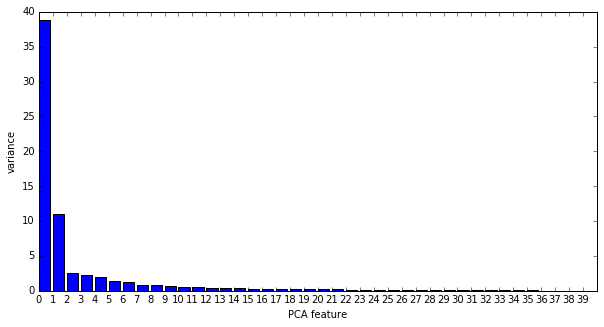

In [110]:
plt.figure(figsize=[10,5])
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [111]:
pca.explained_variance_

array([  3.87820582e+01,   1.10449247e+01,   2.59890491e+00,
         2.19643303e+00,   1.95520105e+00,   1.40256729e+00,
         1.27651879e+00,   7.93755426e-01,   7.67624316e-01,
         6.41258817e-01,   5.42963037e-01,   4.83638378e-01,
         4.14997450e-01,   3.86929563e-01,   3.32264739e-01,
         2.68858590e-01,   2.54114175e-01,   2.48497590e-01,
         2.31766518e-01,   2.24755925e-01,   2.16552377e-01,
         1.92715700e-01,   1.70457015e-01,   1.58115389e-01,
         1.50388082e-01,   1.46087883e-01,   1.43486957e-01,
         1.30628433e-01,   1.23687322e-01,   1.04144832e-01,
         9.16904324e-02,   8.89638208e-02,   8.44579535e-02,
         7.24243347e-02,   6.13400033e-02,   6.06650331e-02,
         4.12759928e-02,   3.73991566e-02,   2.07194460e-02,
         1.05334742e-02])

[  57.92   74.42   78.3    81.58   84.5    86.59   88.5    89.69   90.84
   91.8    92.61   93.33   93.95   94.53   95.03   95.43   95.81   96.18
   96.53   96.87   97.19   97.48   97.73   97.97   98.19   98.41   98.62
   98.82   99.     99.16   99.3    99.43   99.56   99.67   99.76   99.85
   99.91   99.97  100.    100.02]


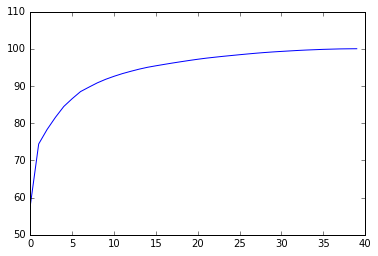

In [112]:
variance_ratio_cum_sum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(variance_ratio_cum_sum)
plt.plot(variance_ratio_cum_sum)

In [113]:
#Looking at above plot I'm taking 8 variables
pca = PCA(n_components=8)
pca.fit(predictors)
Transformed_vector =pca.fit_transform(predictors)
print(Transformed_vector)

[[ 1.92298329  4.71291028 -1.07681335 ..., -2.06799656 -0.23643248
   0.60111614]
 [-0.09761924  6.21522236 -2.22762899 ..., -0.05943287 -1.03506395
   0.29638915]
 [ 5.73390651  3.12482368 -1.00985412 ...,  2.38943163  0.21544313
  -0.62715306]
 ..., 
 [ 1.45570448 -0.64383531 -2.41847782 ..., -0.06637194  2.82192111
   0.69772039]
 [ 1.7730034   1.46090912  2.17735247 ...,  1.06100354  0.36375951
  -0.12864395]
 [-0.33400604  0.60258671  1.71595942 ..., -0.25519088  1.83614119
  -2.5532158 ]]


In [125]:
student_data_without_label=student_data.drop(axis = 1,labels= ["G3"],inplace=False)
features=student_data_without_label.columns
features

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G2',
       'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

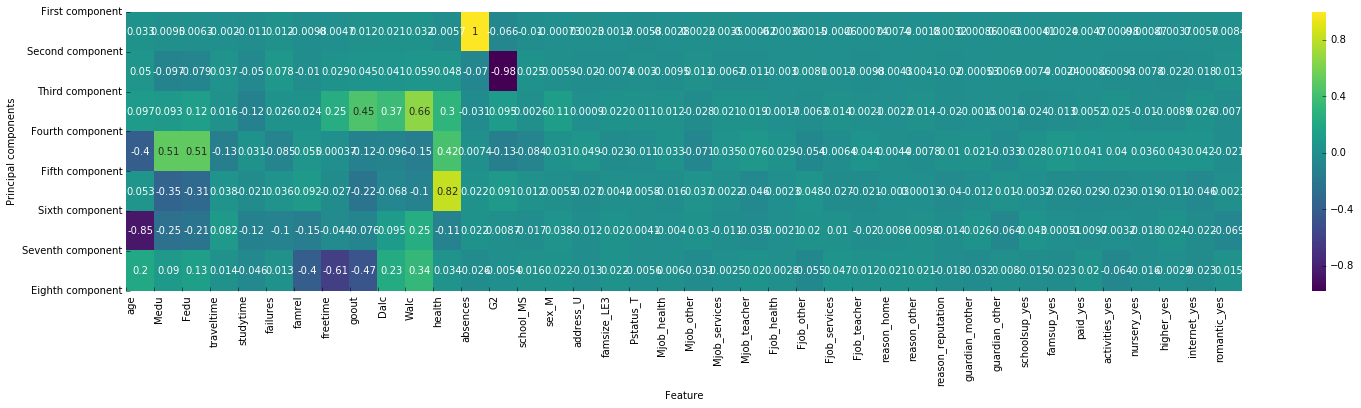

In [127]:
#Visualize coefficients using heat map

plt.figure(figsize=[25,5])
sns.heatmap(pca.components_[0:7,:],annot=True,cmap='viridis')
plt.yticks([0,1,2,3,4,5,6,7],["First component","Second component","Third component","Fourth component","Fifth component","Sixth component","Seventh component","Eighth component"],rotation=360,ha="right")
plt.xticks(range(len(features)),features,rotation=90,ha="left")
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [116]:
lr_pca = linear_model.LinearRegression()

In [117]:
score_lr_pca = cross_val_score(lr_pca, Transformed_vector, label, cv=5)
print("PCA Model Cross Validation score : " + str(score_lr_pca))
print("PCA Model Cross Validation Mean score : " + str(score_lr_pca.mean()))

PCA Model Cross Validation score : [ 0.87588356  0.73033965  0.73560111  0.83447953  0.82221559]
PCA Model Cross Validation Mean score : 0.799703888266


In [119]:
lr = linear_model.LinearRegression()
score_lr = cross_val_score(lr, predictors, label, cv=5)
print("LR Model Cross Validation score : " + str(score_lr))
print("LR Model Cross Validation Mean score : " + str(score_lr.mean()))

LR Model Cross Validation score : [ 0.87841656  0.71763428  0.7310715   0.79448747  0.8121261 ]
LR Model Cross Validation Mean score : 0.786747180576


In [96]:
predictors


array([[18,  4,  4, ...,  1,  0,  0],
       [17,  1,  1, ...,  1,  1,  0],
       [15,  1,  1, ...,  1,  1,  0],
       ..., 
       [18,  1,  1, ...,  1,  0,  0],
       [17,  3,  1, ...,  1,  1,  0],
       [18,  3,  2, ...,  1,  1,  0]], dtype=int64)